In [ ]:
import numpy as np
import cv2 as cv2
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import rinoutils
import os.path as path
import glob
import watershed_extraction as rinocell
#DATASET_PATH = "/home/prf/Desktop/UNI/TESI/Datasets/Dataset Iterazione 2/Immagini 1000X vetrini Citospin"
DATASET_PATH = "/home/prf/Desktop/UNI/TESI/Datasets/Dataset iterazione 1/dataset_240718/palella"

# Iterazione 2 esperimento #1


In [ ]:
rinoutils.displayDatasetMetadata(DATASET_PATH)

### Load dataset

In [ ]:
imgIndex = 8

#Select image
imgList = glob.glob(path.join(DATASET_PATH,"*JPG"))
imgList.extend( glob.glob(path.join(DATASET_PATH,"*jpeg")))
imgList.extend( glob.glob(path.join(DATASET_PATH,"*png")))

imgPath = imgList[imgIndex]
print("Chosed image:\n{}".format(imgPath))

#Show image
img = cv2.imread(imgPath)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

fig,ax = plt.subplots(figsize=(15,15))
ax.set_axis_off()
ax.imshow(img)
plt.show()

In [4]:
def addcircles(labels,ax):
    for region in regionprops(labels):
        x,y = region.centroid
        d = region.equivalent_diameter
        ax.add_patch(mpatches.Circle((y,x),d,color="r",linewidth=1,linestyle="-.",fill=False))
        
def addbbox(labels,ax):
    for region in regionprops(labels):
        xmin,ymin,xmax,ymax  = region.bbox
        ax.add_patch(mpatches.Rectangle((ymin,xmin),(xmax-xmin),(ymax-ymin),color="r",linewidth=1,linestyle="-.",fill=False))

In [5]:
labels = rinocell.detections_cells(img)


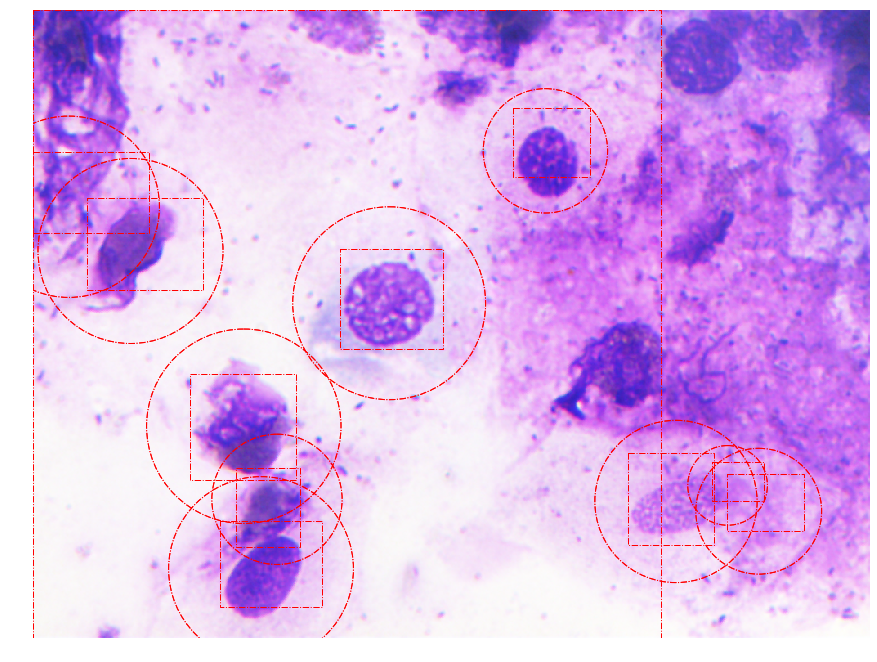

In [7]:
addcircles(labels, ax)
addbbox(labels,ax)
ax.figure